In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(r'..\data\processed\TopDown\max\STD\Image_15_max_STD.csv')
data.head()

,x,y,max_STD,depth_value
0,0,0,0.187542,1.635802
1,0,1,0.180687,1.634016
2,0,2,0.173892,1.632593
3,0,3,0.174478,1.631468
4,0,4,0.174651,1.630676


In [ ]:
correlations = []
for i in range(15, 16):
    # data = pd.read_csv(r'..\data\processed\TopDown\max\STD\Image_'+str(i+1)+'_max_STD.csv')
    data_max_std = pd.read_csv(r'..\data\processed\TopDown\max\STD\Image_'+str(i+1)+'_max_STD.csv')
    data_min_std = pd.read_csv(r'..\data\processed\TopDown\min\STD\Image_'+str(i+1)+'_min_STD.csv')
    data_mean_std = pd.read_csv(r'..\data\processed\TopDown\mean\STD\Image_'+str(i+1)+'_mean_STD.csv')
    data_max_entropy = pd.read_csv(r'..\data\processed\TopDown\max\Entropy\Image_'+str(i+1)+'_max_Entropy.csv')
    data_min_entropy = pd.read_csv(r'..\data\processed\TopDown\min\Entropy\Image_'+str(i+1)+'_min_Entropy.csv')
    data_mean_entropy = pd.read_csv(r'..\data\processed\TopDown\mean\Entropy\Image_'+str(i+1)+'_mean_Entropy.csv')
    
    # Merge dataframes based on x, y coordinates
    combined_df = pd.DataFrame()
    combined_df['max_STD'] = data_max_std['max_STD']
    combined_df['min_STD'] = data_min_std['min_STD']
    combined_df['mean_STD'] = data_mean_std['mean_STD']
    combined_df['max_Entropy'] = data_max_entropy['max_Entropy']
    combined_df['min_Entropy'] = data_min_entropy['min_Entropy']
    combined_df['mean_Entropy'] = data_mean_entropy['mean_Entropy']
    combined_df['depth_value'] = data_mean_entropy['depth_value']

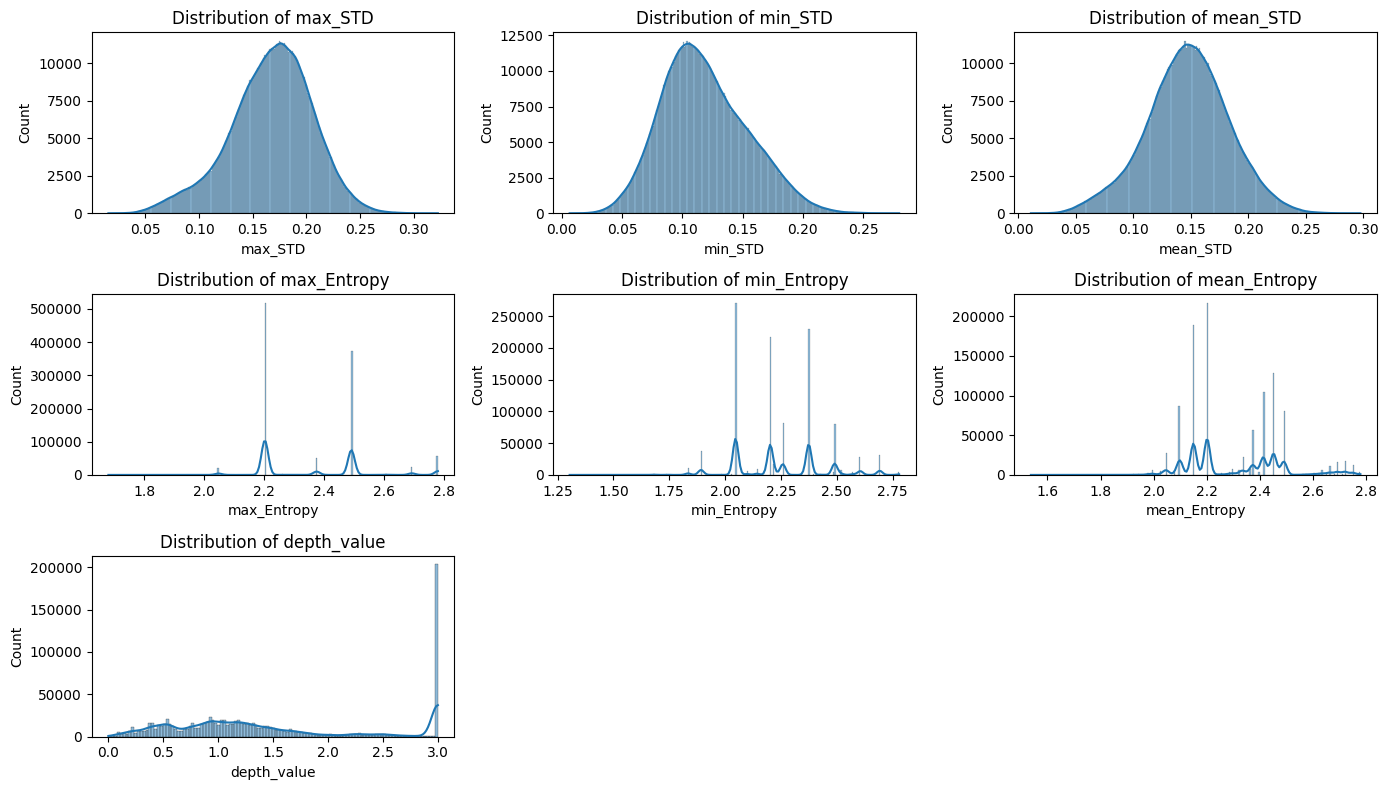

In [ ]:
# # Visualizing feature distributions
features = ['max_STD', 'min_STD', 'mean_STD', 'max_Entropy', 'min_Entropy', 'mean_Entropy', 'depth_value']
# plt.figure(figsize=(14, 8))
# for idx, feature in enumerate(features):
#     plt.subplot(3, 3, idx + 1)
#     sns.histplot(combined_df[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
# plt.tight_layout()
# plt.show()

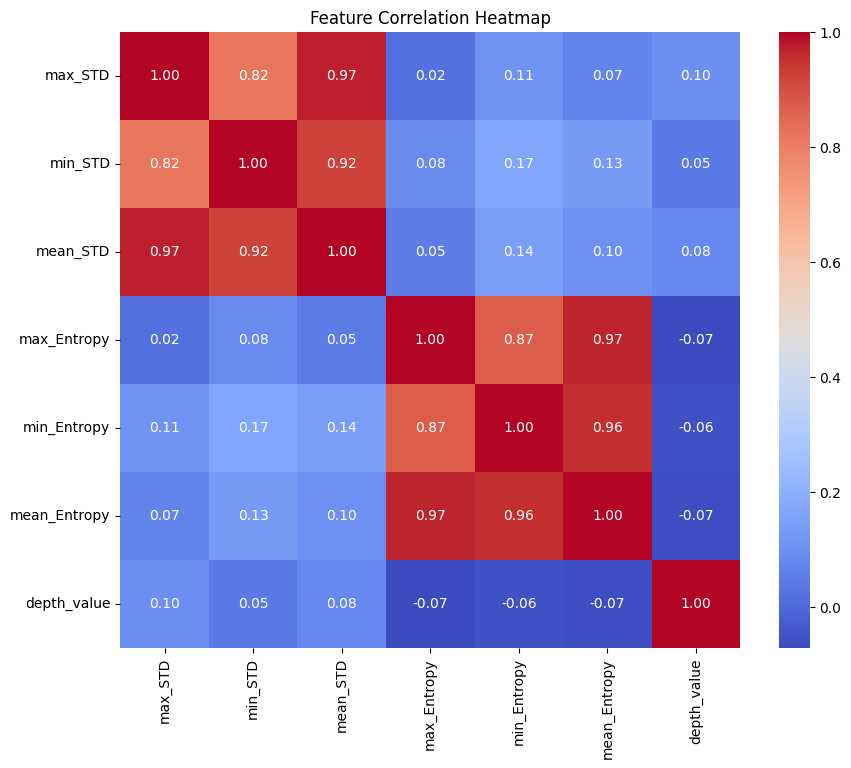

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature importance analysis with Random Forest
X = combined_df[features[:1]]
y = combined_df['depth_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
predictions = rf.predict(X_test)
print("\nRandom Forest Regression Evaluation:")
print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False):.4f}')
print(f'MAE: {mean_absolute_error(y_test, predictions):.4f}')
print(f'R^2 Score: {r2_score(y_test, predictions):.4f}')

# Feature importance visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()